<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%204/flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

In [2]:
# Upload File
from google.colab import files
uploaded = files.upload()

# Load Data
df = pd.read_csv(next(iter(uploaded)))
df = df.drop(columns=["InitialPCRDiagnosis"], errors='ignore')
df = df.dropna(thresh=0.5*len(df), axis=1)
df = df.dropna()


Saving flu.csv to flu.csv


In [3]:
# Encoding Fitur Kategorikal
label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


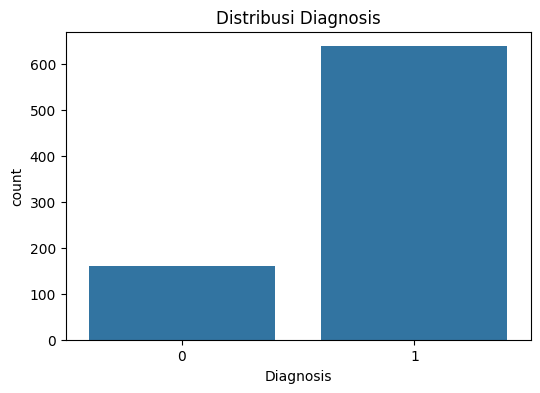

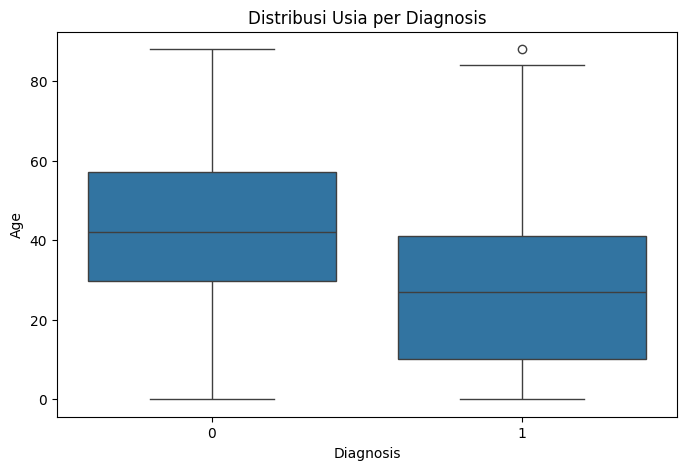

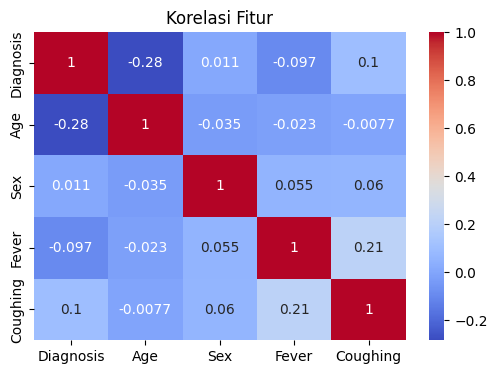

In [4]:
# Visualisasi EDA
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Diagnosis')
plt.title("Distribusi Diagnosis")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Diagnosis', y='Age')
plt.title("Distribusi Usia per Diagnosis")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur")
plt.show()

In [5]:
# Model Training
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


🔎 Classification Report:

              precision    recall  f1-score   support

           0       0.29      0.11      0.16        37
           1       0.77      0.92      0.84       123

    accuracy                           0.73       160
   macro avg       0.53      0.51      0.50       160
weighted avg       0.66      0.73      0.68       160

Akurasi     : 0.73
Presisi     : 0.77
Recall      : 0.92
F1 Score    : 0.84
ROC AUC     : 0.63


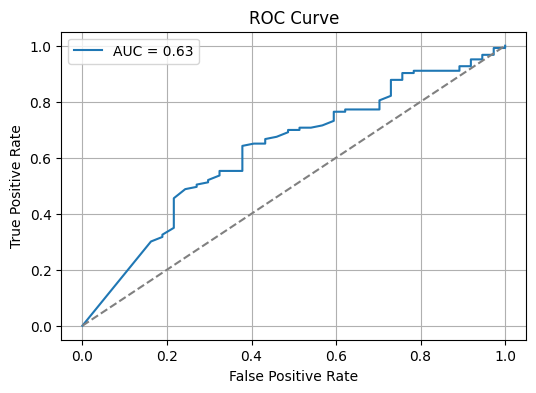

In [6]:
# Evaluasi Model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"Akurasi     : {acc:.2f}")
print(f"Presisi     : {prec:.2f}")
print(f"Recall      : {rec:.2f}")
print(f"F1 Score    : {f1:.2f}")
print(f"ROC AUC     : {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

1. Akurasi

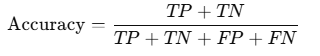

Penjelasan:

Mengukur seberapa banyak prediksi yang benar dibandingkan total seluruh data.

Cocok digunakan jika data seimbang (jumlah label positif dan negatif seimbang).

TP = True Positives: kasus positif yang diprediksi benar

TN = True Negatives: kasus negatif yang diprediksi benar

FP = False Positives: kasus negatif yang diprediksi sebagai positif

FN = False Negatives: kasus positif yang diprediksi sebagai negatif

2. Presisi

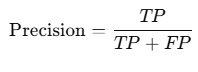

Penjelasan:

Mengukur seberapa banyak prediksi positif yang benar-benar positif.

Berguna ketika biaya salah prediksi positif tinggi (misalnya diagnosa penyakit serius).

Mencegah terlalu banyak False Positives.

3. Recall

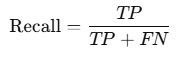

Penjelasan:

Mengukur seberapa banyak kasus positif yang berhasil ditemukan oleh model.

Penting jika menghindari kesalahan deteksi negatif (False Negatives).

Biasanya digunakan dalam aplikasi kesehatan, keamanan, dan forensik.